In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')

In [ ]:
# check for missing data
print(data.isnull().sum())

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         15318
Road Name                          14483
Cross-Street Type                  15342
Cross-Street Name                  14489
Off-Road Description              141985
Municipality                      139082
Related Non-Motorist              151548
Collision Type                       524
Weather                            12311
Surface Condition                  18365
Light                               1296
Traffic Control                    23545
Driver Substance Abuse             28472
Non-Motorist Substance Abuse      152570
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      127533
Driver Distracted By                   0
Drivers License 

In [ ]:
data.describe

<bound method NDFrame.describe of        Report Number Local Case Number                Agency Name  \
0         DD5620004G         190046109  Rockville Police Departme   
1        MCP29620057         200023865   Montgomery County Police   
2        MCP2651004P         210035267   Montgomery County Police   
3        MCP3050004K         200016465   Montgomery County Police   
4        MCP2641001J         200016526   Montgomery County Police   
...              ...               ...                        ...   
156461   MCP2612004Y         220038128   Montgomery County Police   
156462   MCP32790021         230011209   Montgomery County Police   
156463   MCP3226003P         230011811   Montgomery County Police   
156464   MCP31210058         230010598   Montgomery County Police   
156465    EJ7899000L         230011885  Gaithersburg Police Depar   

             ACRS Report Type  Crash Date/Time        Route Type  \
0       Property Damage Crash   9/26/2019 7:20               NaN   
1

In [ ]:
#deleting unneccessary column from datasets which have too many missing values and unique id.
data.drop(["Circumstance","Non-Motorist Substance Abuse","Related Non-Motorist","Municipality","Off-Road Description","Equipment Problems","Latitude","Longitude","Location","Vehicle ID","Person ID","Report Number","Local Case Number","Road Name","Cross-Street Name","Parked Vehicle","Crash Date/Time"], axis=1, inplace=True)


In [ ]:
data.shape

(156466, 26)

In [ ]:
data.columns

Index(['Agency Name', 'ACRS Report Type', 'Route Type', 'Cross-Street Type',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault',
       'Injury Severity', 'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model'],
      dtype='object')

In [ ]:
#Here i am gonna remove white space from the column name
data.columns = data.columns.str.replace(' ', '_')

In [ ]:
data.columns

Index(['Agency_Name', 'ACRS_Report_Type', 'Route_Type', 'Cross-Street_Type',
       'Collision_Type', 'Weather', 'Surface_Condition', 'Light',
       'Traffic_Control', 'Driver_Substance_Abuse', 'Driver_At_Fault',
       'Injury_Severity', 'Driver_Distracted_By', 'Drivers_License_State',
       'Vehicle_Damage_Extent', 'Vehicle_First_Impact_Location',
       'Vehicle_Second_Impact_Location', 'Vehicle_Body_Type',
       'Vehicle_Movement', 'Vehicle_Continuing_Dir', 'Vehicle_Going_Dir',
       'Speed_Limit', 'Driverless_Vehicle', 'Vehicle_Year', 'Vehicle_Make',
       'Vehicle_Model'],
      dtype='object')

In [ ]:
print(data.isnull().sum())

Agency_Name                           0
ACRS_Report_Type                      0
Route_Type                        15318
Cross-Street_Type                 15342
Collision_Type                      524
Weather                           12311
Surface_Condition                 18365
Light                              1296
Traffic_Control                   23545
Driver_Substance_Abuse            28472
Driver_At_Fault                       0
Injury_Severity                       0
Driver_Distracted_By                  0
Drivers_License_State              8664
Vehicle_Damage_Extent               277
Vehicle_First_Impact_Location       156
Vehicle_Second_Impact_Location      256
Vehicle_Body_Type                  2397
Vehicle_Movement                    329
Vehicle_Continuing_Dir             2433
Vehicle_Going_Dir                  2433
Speed_Limit                           0
Driverless_Vehicle                    0
Vehicle_Year                          0
Vehicle_Make                         22


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156466 entries, 0 to 156465
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Agency_Name                     156466 non-null  object
 1   ACRS_Report_Type                156466 non-null  object
 2   Route_Type                      141148 non-null  object
 3   Cross-Street_Type               141124 non-null  object
 4   Collision_Type                  155942 non-null  object
 5   Weather                         144155 non-null  object
 6   Surface_Condition               138101 non-null  object
 7   Light                           155170 non-null  object
 8   Traffic_Control                 132921 non-null  object
 9   Driver_Substance_Abuse          127994 non-null  object
 10  Driver_At_Fault                 156466 non-null  object
 11  Injury_Severity                 156466 non-null  object
 12  Driver_Distracted_By          

In [ ]:
print(data.isnull().sum())

Agency_Name                           0
ACRS_Report_Type                      0
Route_Type                        15318
Cross-Street_Type                 15342
Collision_Type                      524
Weather                           12311
Surface_Condition                 18365
Light                              1296
Traffic_Control                   23545
Driver_Substance_Abuse            28472
Driver_At_Fault                       0
Injury_Severity                       0
Driver_Distracted_By                  0
Drivers_License_State              8664
Vehicle_Damage_Extent               277
Vehicle_First_Impact_Location       156
Vehicle_Second_Impact_Location      256
Vehicle_Body_Type                  2397
Vehicle_Movement                    329
Vehicle_Continuing_Dir             2433
Vehicle_Going_Dir                  2433
Speed_Limit                           0
Driverless_Vehicle                    0
Vehicle_Year                          0
Vehicle_Make                         22


In [ ]:
# Get the list of categorical column names
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Fill empty cells with "not known" for all categorical columns
for col in cat_cols:
    data[col] = data[col].fillna('not known')

In [ ]:
print(data.isnull().sum())

Agency_Name                       0
ACRS_Report_Type                  0
Route_Type                        0
Cross-Street_Type                 0
Collision_Type                    0
Weather                           0
Surface_Condition                 0
Light                             0
Traffic_Control                   0
Driver_Substance_Abuse            0
Driver_At_Fault                   0
Injury_Severity                   0
Driver_Distracted_By              0
Drivers_License_State             0
Vehicle_Damage_Extent             0
Vehicle_First_Impact_Location     0
Vehicle_Second_Impact_Location    0
Vehicle_Body_Type                 0
Vehicle_Movement                  0
Vehicle_Continuing_Dir            0
Vehicle_Going_Dir                 0
Speed_Limit                       0
Driverless_Vehicle                0
Vehicle_Year                      0
Vehicle_Make                      0
Vehicle_Model                     0
dtype: int64


In [ ]:
data.corr()

,Speed_Limit,Vehicle_Year
Speed_Limit,1.000000,0.054619
Vehicle_Year,0.054619,1.000000


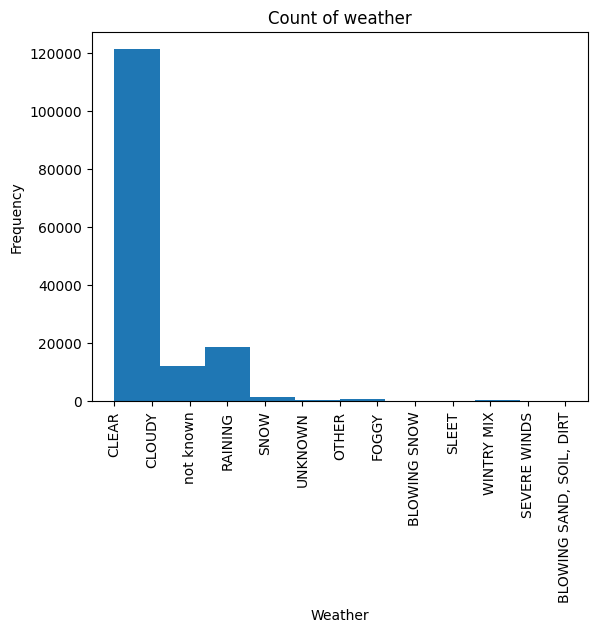

In [ ]:
# Create a histogram 
plt.hist(x='Weather', data=data)
plt.xticks(rotation=90)

plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.title('Count of weather')

# Display the histogram
plt.show()


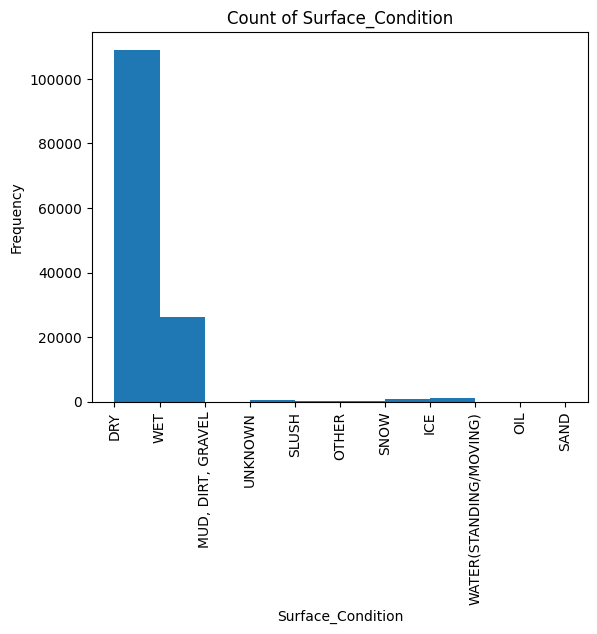

In [ ]:
# Create a histogram
filtered_data = data[data['Surface_Condition'] != 'not known']
plt.hist(x='Surface_Condition', data = filtered_data)
plt.xticks(rotation=90)

plt.xlabel('Surface_Condition')
plt.ylabel('Frequency')
plt.title('Count of Surface_Condition')

# Display the histogram
plt.show()

Text(0, 0.5, 'Reported Crash')

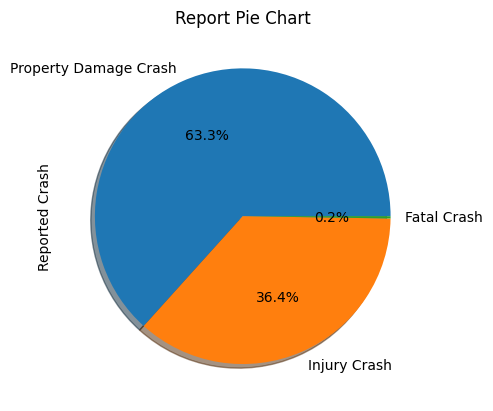

In [ ]:
data['ACRS_Report_Type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True) 
plt.title("Report Pie Chart")
plt.ylabel("Reported Crash")

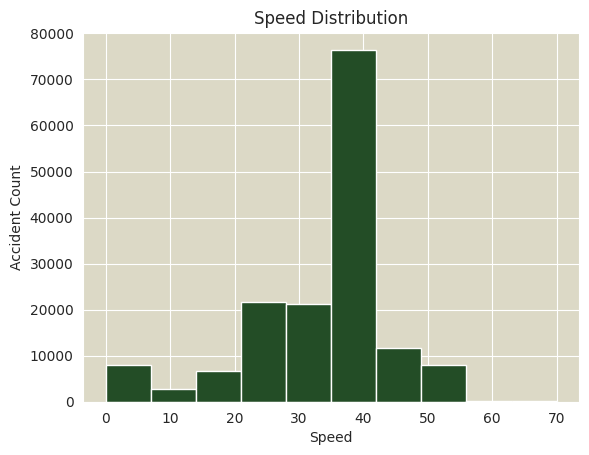

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": "#dcd9c6"})
plt.hist(data['Speed_Limit'], bins=10, color='#234d26')
plt.title('Speed Distribution')
plt.xlabel('Speed')
plt.ylabel('Accident Count')
plt.show()

In [ ]:
data.nunique()

Agency_Name                         10
ACRS_Report_Type                     3
Route_Type                          11
Cross-Street_Type                   11
Collision_Type                      19
Weather                             13
Surface_Condition                   12
Light                                9
Traffic_Control                     12
Driver_Substance_Abuse              12
Driver_At_Fault                      3
Injury_Severity                      5
Driver_Distracted_By                19
Drivers_License_State               75
Vehicle_Damage_Extent                8
Vehicle_First_Impact_Location       17
Vehicle_Second_Impact_Location      17
Vehicle_Body_Type                   31
Vehicle_Movement                    23
Vehicle_Continuing_Dir               6
Vehicle_Going_Dir                    6
Speed_Limit                         15
Driverless_Vehicle                   2
Vehicle_Year                       133
Vehicle_Make                      1773
Vehicle_Model            

Text(0.5, 1.0, 'Vehicle Damage Distribution')

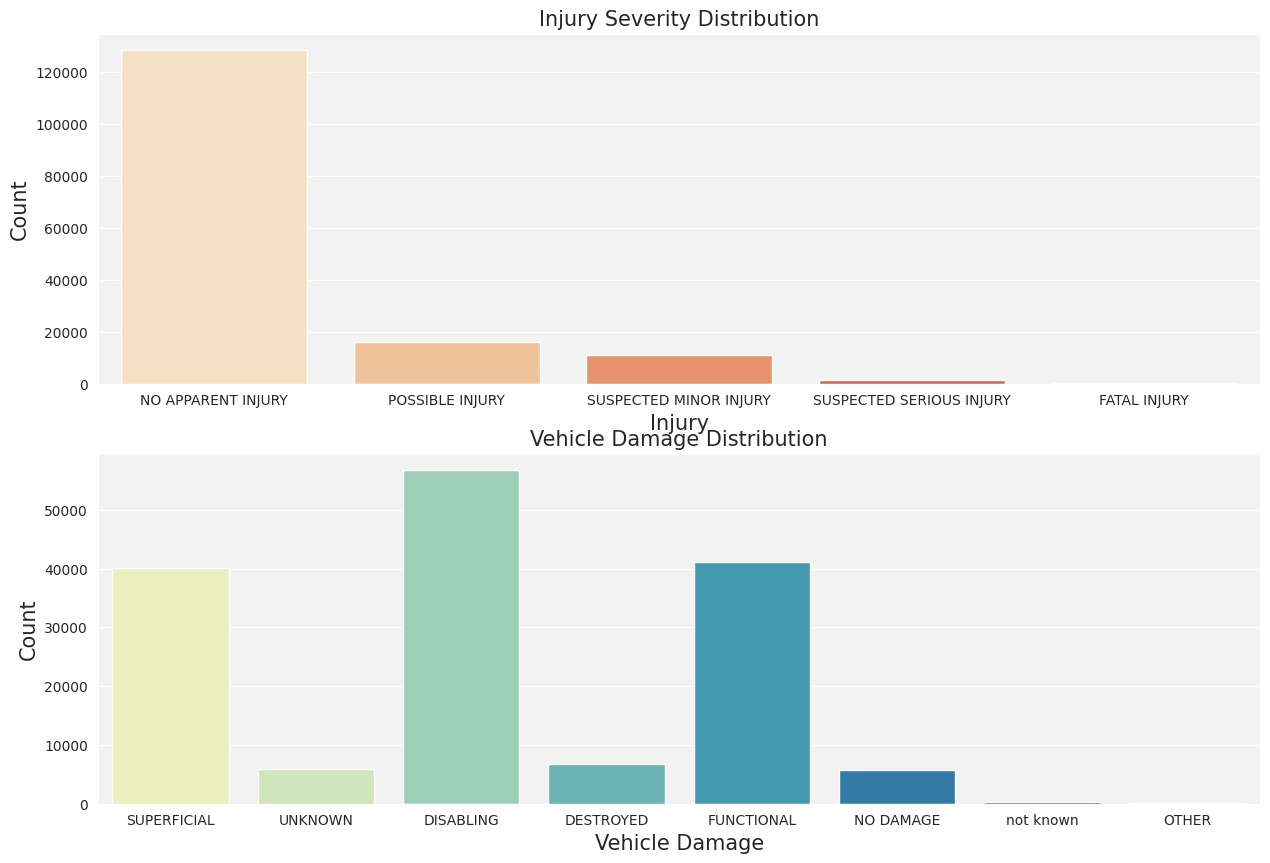

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color
sns.set_style("darkgrid", {"axes.facecolor": "#f2f2f2"})

# Create the figure and the subplots
fig, axs = plt.subplots(nrows=2, figsize=(15, 10))

# Plot the original data in the top subplot
sns.countplot(x='Injury_Severity', palette="OrRd", data=data, ax=axs[0])
axs[0].set_xlabel("Injury", fontsize=15)
axs[0].set_ylabel("Count", fontsize=15)
axs[0].set_title("Injury Severity Distribution", fontsize=15)

# Plot the cleaned data in the bottom subplot
sns.countplot(x='Vehicle_Damage_Extent', palette="YlGnBu", data=data, ax=axs[1])
axs[1].set_xlabel("Vehicle Damage", fontsize=15)
axs[1].set_ylabel("Count", fontsize=15)
axs[1].set_title("Vehicle Damage Distribution", fontsize=15)

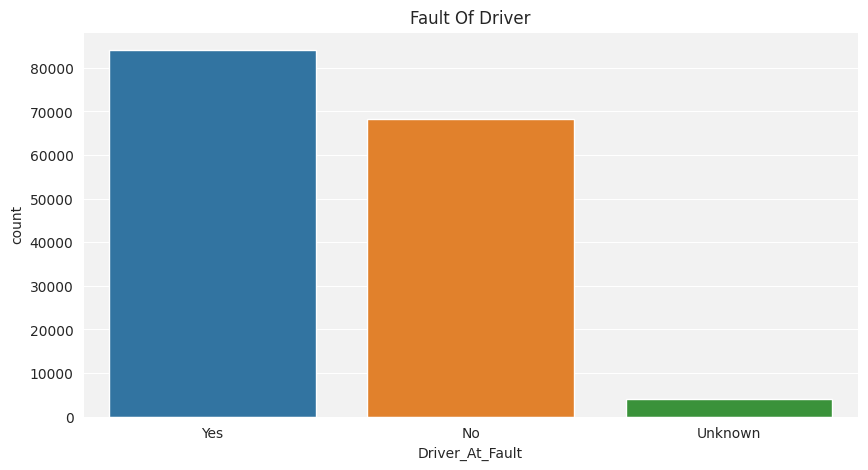

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Driver_At_Fault', data=data)
plt.title('Fault Of Driver')
plt.show()

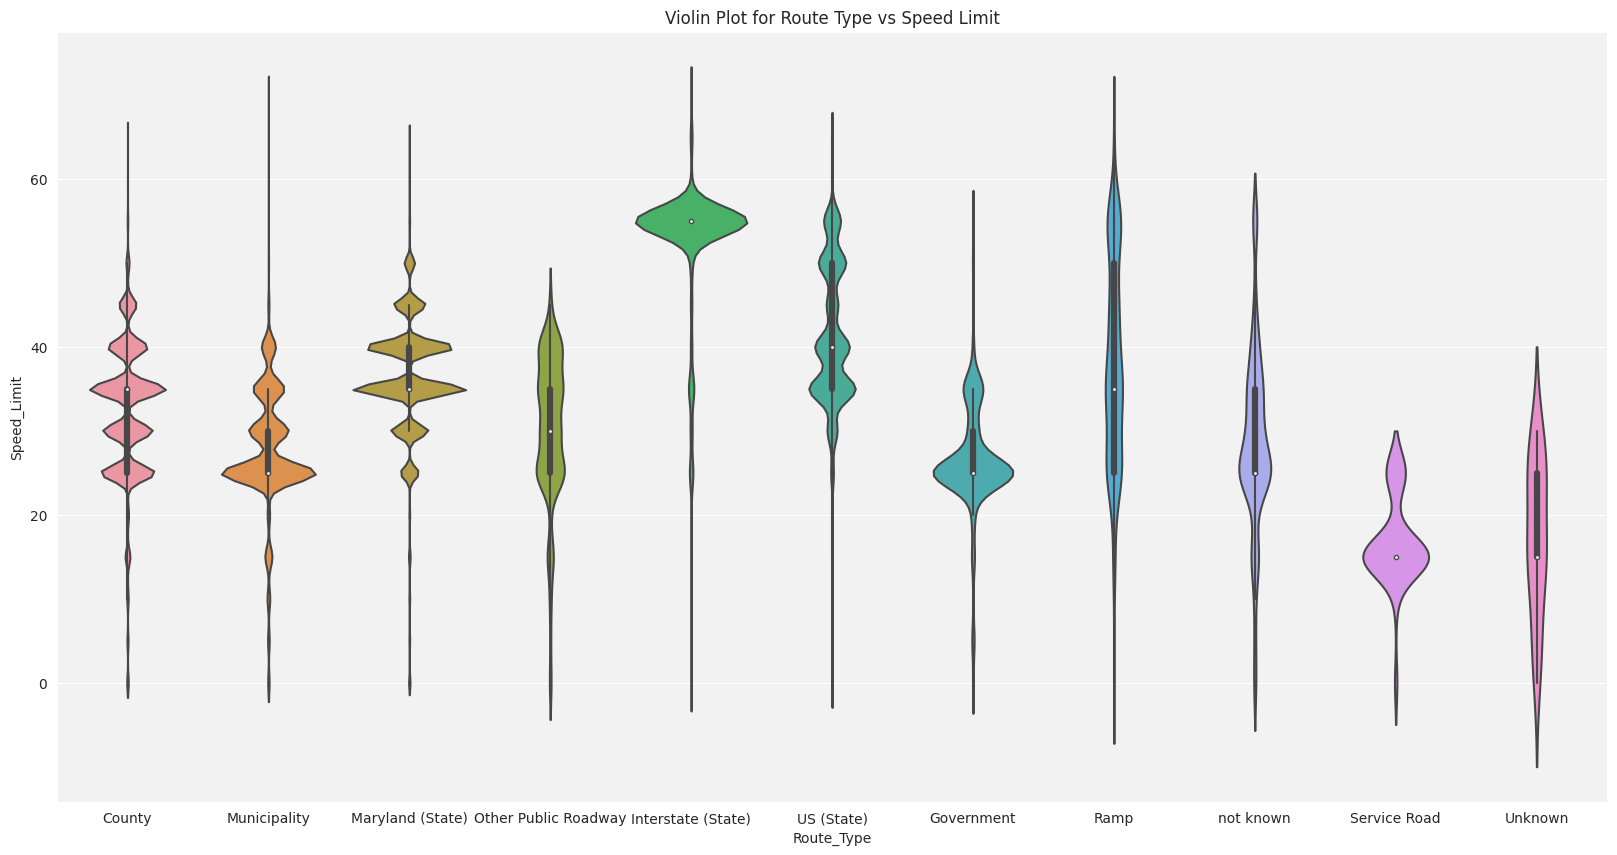

In [ ]:
filtered_data = data[data['Surface_Condition'] != 'not known']
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='Route_Type', y='Speed_Limit', data=filtered_data)
plt.title('Violin Plot for Route Type vs Speed Limit')
plt.show()